In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Understaing the data:

In [3]:
# Load Dataset
df=pd.read_csv('customer_experience_data.csv')

In [4]:
# Number Of Columns and Rows
df.shape

# Conclusion: 
# This data set have a 1000 Rows and 14 Columns

(1000, 14)

In [5]:
# Basic Info:

df.info()

# Conclusion:
# we have 10 columns of int data type 
# we have 1 column of float data type
# we have 3 columns of object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [6]:
# First 5 Rows

df.head()

# Conclusion:
# Data looks clean with expected structure.

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [7]:
# check for missing values

df.isnull().sum()

# Conclusion:
# Data looks clean with expected structure.

Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64

In [8]:
#  Descriptive Statistics

df.describe()

# Conclusion:

# Customer_ID: Unique ID from 1 to 1000, not useful for modeling.
# Age: Avg ~44 years, range 18–69, diverse age group.
# Num_Interactions: Avg ~7.5 interactions, range 1–14, moderate engagement.
# Feedback_Score: Avg ~3 (out of 5), range 1–5, mixed feedback.
# Products_Purchased: Avg ~10, range 1–19, varied purchase behavior.
# Products_Viewed: Avg ~27, range 5–49, some customers browse more.
# Time_Spent_on_Site: Avg ~32.3 mins, range 5.1–59.9, varying engagement.
# Satisfaction_Score: Avg ~5.5 (likely out of 10), range 1–10, moderate satisfaction.
# Gender_Encoded: Binary 0/1, mean ~0.52, roughly balanced genders.
# Location_Encoded: Encoded 0/1/2, mean ~1.03, balanced locations.
# Retention_Status_Encoded: Binary 0/1, mean ~0.69, ~69% customers retained.

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


### Conclusion the dataset


### Exploratory Data Analysis

### Univariate Analysis(Numerical Columns)

#### Age Column:

In [13]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Location', 'Num_Interactions',
       'Feedback_Score', 'Products_Purchased', 'Products_Viewed',
       'Time_Spent_on_Site', 'Satisfaction_Score', 'Retention_Status',
       'Gender_Encoded', 'Location_Encoded', 'Retention_Status_Encoded'],
      dtype='object')

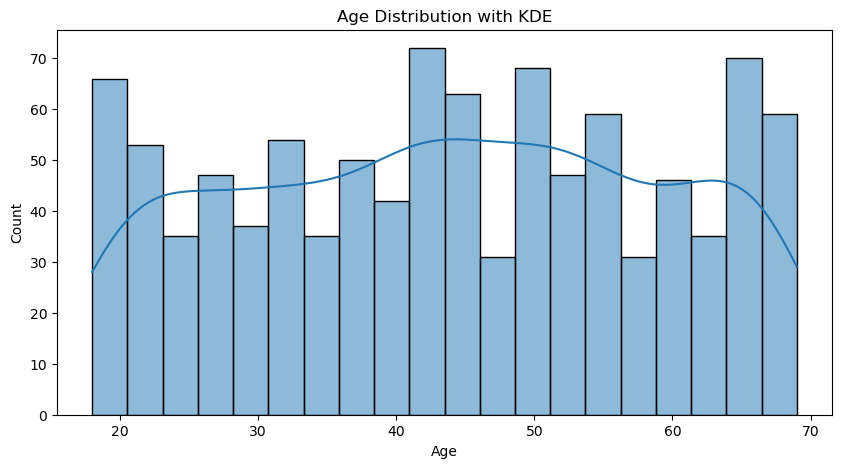

In [15]:
# Histogram for Age

plt.figure(figsize=(10,5))
sns.histplot(df['Age'],bins=20,kde=True)
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Conclusion:
# we can see that there are number of people bewteen age of 40 to 50 which indicates that adults are more compared to the young are people

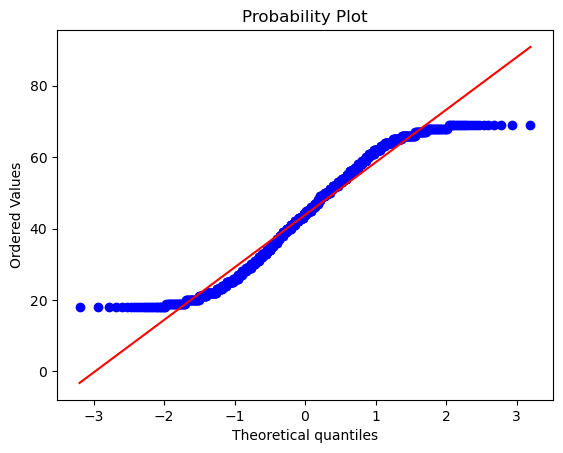

In [21]:
# QQ-plot for Age

age=df['Age']
stats.probplot(age,dist='norm',plot=plt)
plt.show()

# Conclusion:
# we can see that the distribution is not in guassian 

In [24]:
# KS Test

age=df['Age']

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution
    
# Standrization:
age_mean=np.mean(age)
age_std=np.std(age)
age_standardized=(age-age_mean)/age_std

ks_stats,p_value=stats.kstest(age_standardized,'norm')

if p_value*100>=5:
    print("H0 is accepted")
else:
    print('H1 is accepted')

# Conclusion :
# From the p_value we can coclude that null Hypothesis is regected which means the Age may not following the Gussian Distribution

H1 is accepted


<Axes: ylabel='Age'>

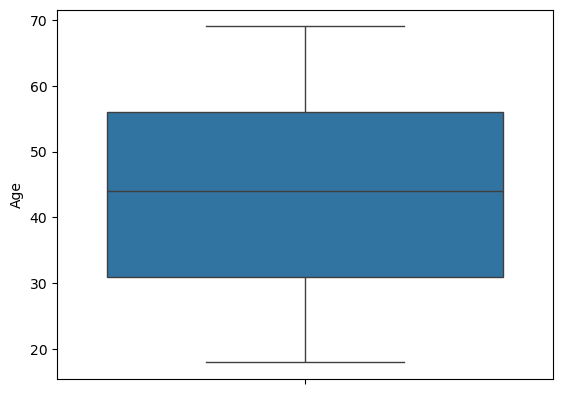

In [25]:
# Checking the outliers:

sns.boxplot(df['Age'])

# Conclusion :
# There are no outliers in the Age column so the mean is not effected


#### Conclusion On Age column:

#### Num_Interactions Column:

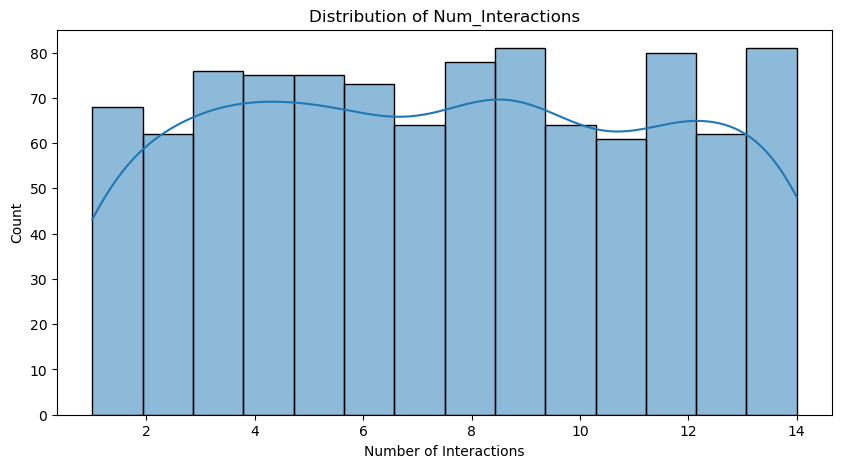

In [32]:
# Distribution plot and KDE

plt.figure(figsize=(10,5))
sns.histplot(df['Num_Interactions'],bins=14,kde=True)
plt.title('Distribution of Num_Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Count')
plt.show()

# Conclusion:
# we can say that the number of interactions with the web site is moderatly distributed
# we have more interaction about 12 to 14 (14 have 81 count)
# we have les interactions about 10 to 11 ( 11 have 61 count)

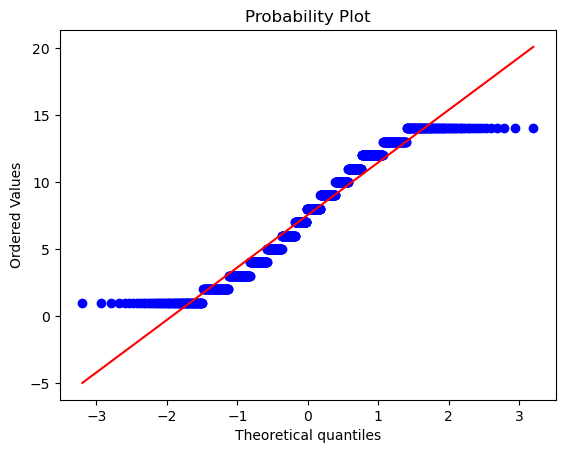

In [34]:
# QQ-Plot

stats.probplot(df['Num_Interactions'],dist='norm',plot=plt)
plt.show()

# Conclusion :
# The Num_Interactions column is not follwing the Gussian Distribution

In [36]:
## KS-Test:

num_int=df['Num_Interactions']
# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution
    
# standerization
num_mean=np.mean(num_int)
num_std=np.std(num_int)
num_standerdized=(num_int-num_mean)/num_std

ks_stats,p_value=stats.kstest(num_standerdized,'norm')


if p_value*100>=5:
    print("H0 is accepted")
else:
    print('H1 is accepted')

# Conclusion:
# since H1 is accepted which mean that the Num_Interactions column is not follwing the Gussian Distribution

H1 is accepted


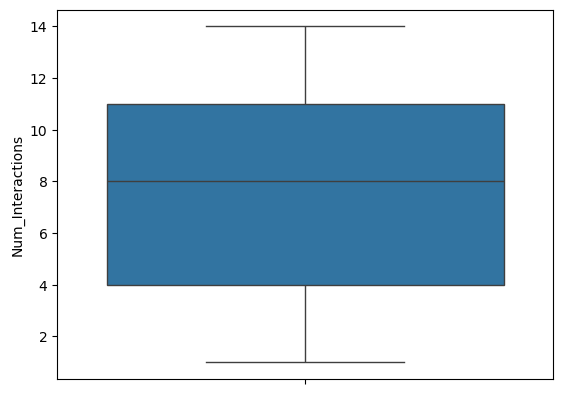

In [38]:
# Outliers

sns.boxplot(df['Num_Interactions'])
plt.show()

# Conclusion:
# There are no outlier present in the Num_Interactions column

#### Conclusion on the Num_Interactions column

#### Feedback_Score Column

C:\Users\bhara\AppData\Local\Temp\ipykernel_10652\3345279126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Feedback_Score', data=df, palette='pastel')


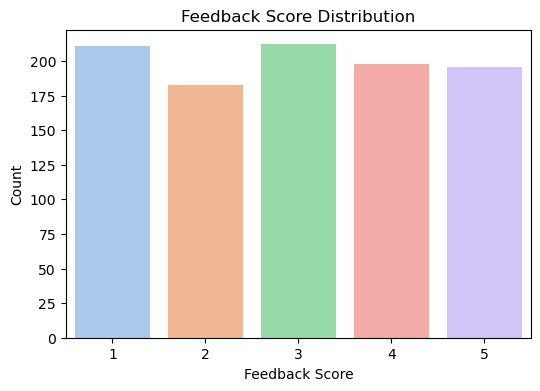

In [42]:
# countplot

plt.figure(figsize=(6,4))
sns.countplot(x='Feedback_Score', data=df, palette='pastel')
plt.title('Feedback Score Distribution')
plt.xlabel('Feedback Score')
plt.ylabel('Count')
plt.show()


#### Conclusion on Feedback_Score Column:

#### Products_Purchased Column

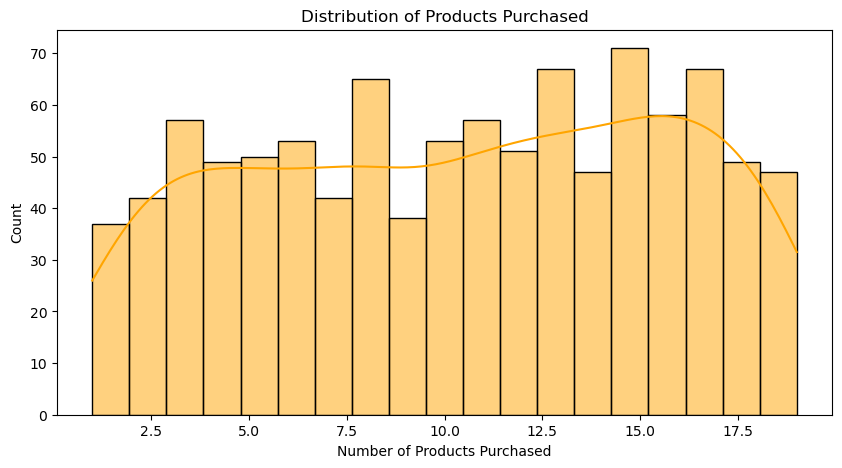

In [46]:
# Histogram with KDE

plt.figure(figsize=(10,5))
sns.histplot(df['Products_Purchased'], kde=True, bins=19, color='orange')
plt.title('Distribution of Products Purchased')
plt.xlabel('Number of Products Purchased')
plt.ylabel('Count')
plt.show()

# Conclusion:
# The 15 products purchased have more count
# The distribution is approximately symmetric with slight right skew.
# Most customers purchase around 12–17 products, indicating more buying behavior.


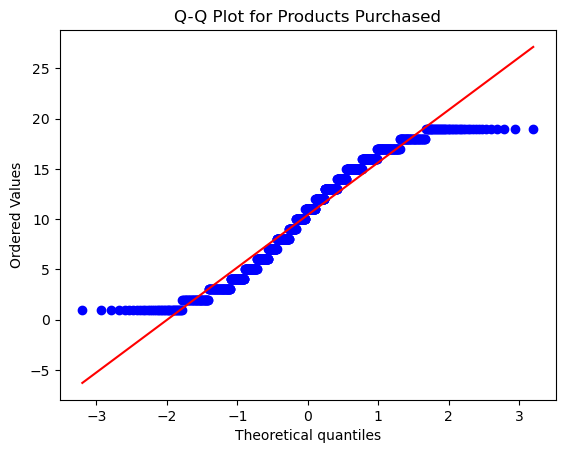

In [48]:
# QQ-Plot

stats.probplot(df['Products_Purchased'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Products Purchased")
plt.show()

# Conclusion:
# This column is not following the Guassian Distribution


In [50]:
# KS Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution
    
# standerization
mean_val = df['Products_Purchased'].mean()
std_val = df['Products_Purchased'].std()
standardized_vals = (df['Products_Purchased'] - mean_val) / std_val

ks_stat, p_value = stats.kstest(standardized_vals, 'norm')

if p_value*100>=5:
    print("H0 is accepted")
else:
    print('H1 is accepted')

# Conclusion:
# since H1 is accepted which mean that the Products_Purchased Column is not follwing the Gussian Distribution

H1 is accepted


#### Conclusions on Products_Purchased Column


#### Products_Viewed Column

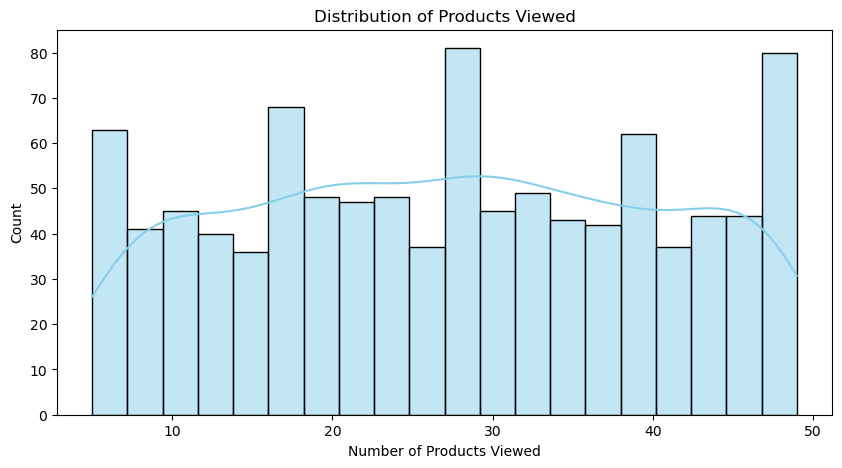

In [54]:
# Histogram with KDE

plt.figure(figsize=(10,5))
sns.histplot(df['Products_Viewed'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Products Viewed')
plt.xlabel('Number of Products Viewed')
plt.ylabel('Count')
plt.show()

# Conclusion
# Most customers viwed at least 28 or 48 products

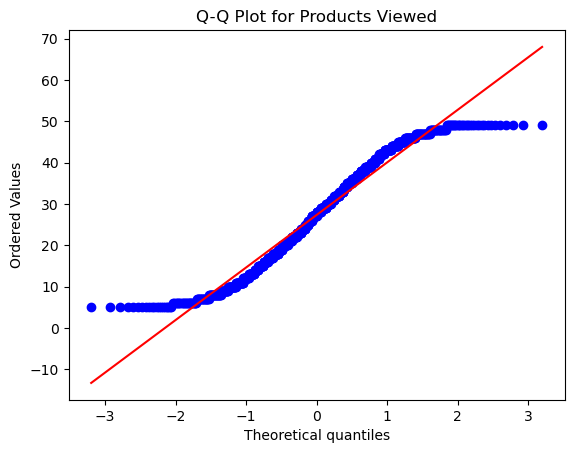

In [56]:
# QQ-Plot

stats.probplot(df['Products_Viewed'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Products Viewed")
plt.show()

# Conclusion 
# This column is not following the Guassian Distribution

In [58]:
# KS Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution
    
# standerization
mean_val = df['Products_Purchased'].mean()
std_val = df['Products_Purchased'].std()
standardized_vals = (df['Products_Purchased'] - mean_val) / std_val

ks_stat, p_value = stats.kstest(standardized_vals, 'norm')

if p_value*100>=5:
    print("H0 is accepted")
else:
    print('H1 is accepted')

# Conclusion:
# since H1 is accepted which mean that the Products_Purchased Column is not follwing the Gussian Distribution

H1 is accepted


#### Conclusion on Products_Viewed  column


#### Time_Spent_on_Site Column

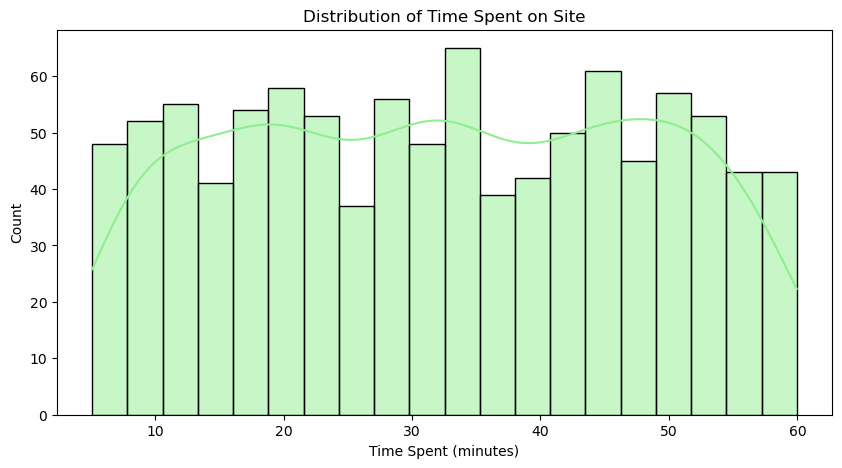

In [79]:
# Histogram with KDE plot

plt.figure(figsize=(10,5))
sns.histplot(df['Time_Spent_on_Site'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Time Spent on Site')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Count')
plt.show()

# Conclusion:

# Most customer spent an average of 30 minutes on the site
# it seems like a right skewed which indacates that more people spnet more time than the average 
# the range variesfrom 5 to 60 minutes

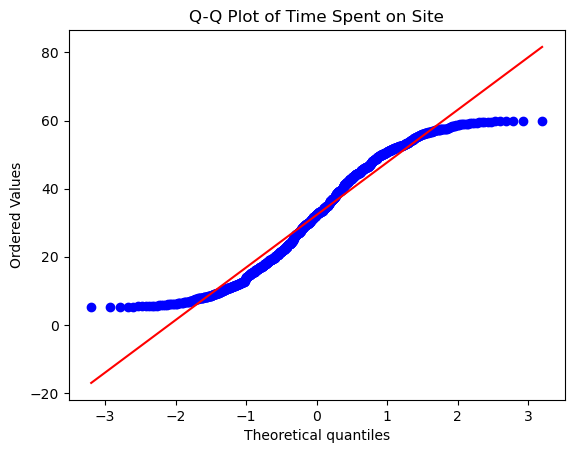

In [81]:
# QQ Plot
 
import scipy.stats as stats
stats.probplot(df['Time_Spent_on_Site'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Time Spent on Site")
plt.show()

# Conclusion
# It seems that this may not  follow the Guassian distribution


In [83]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution

data=df['Time_Spent_on_Site']
# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data,dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# The Time_spent_on_Site coulumn is not in Guassin Distriubution


H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion on 'Time_Spent_on_Site' Column


#### Satisfaction_Score Column

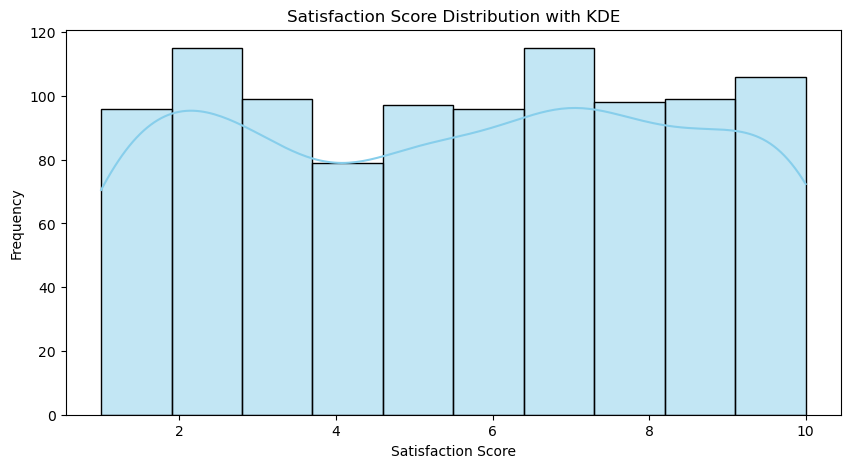

In [99]:
# Histogram with KDE plot

plt.figure(figsize=(10,5))
sns.histplot(df['Satisfaction_Score'], kde=True, bins=10, color='skyblue')
plt.title("Satisfaction Score Distribution with KDE")
plt.xlabel("Satisfaction Score")
plt.ylabel("Frequency")
plt.show()

# Conclusion

# The average score is ~5.5, indicating moderate satisfaction.
# The Customer with stisfaction more than the average are more

#### Conclusion on Satisfaction_Score Column

### Univariate Analysis(Categorical Columns)

#### Gender Column

C:\Users\bhara\AppData\Local\Temp\ipykernel_10652\2407334430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


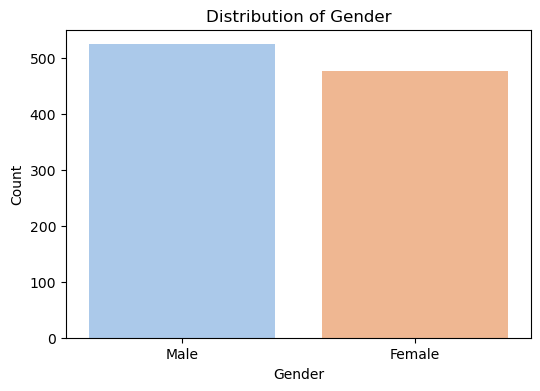

In [115]:
# Count Plot

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### Conclusion on Gender Column

#### Location Column

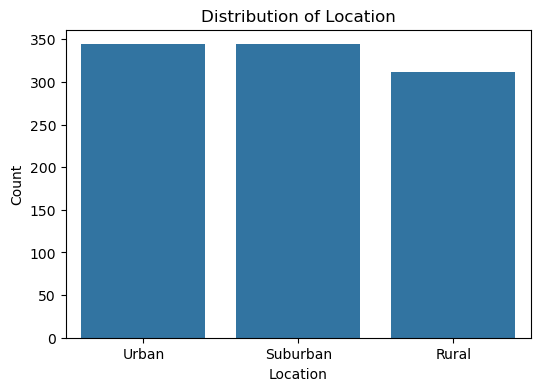

In [150]:
# Count Plot

plt.figure(figsize=(6,4))
sns.countplot(x='Location',data=df)
plt.title('Distribution of Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

#### Conclusion on Location Column

#### Retention_Status Column

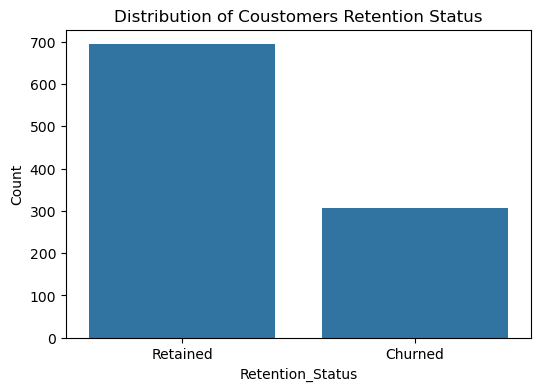

In [148]:
# CountPlot

plt.figure(figsize=(6,4))
sns.countplot(x='Retention_Status',data=df)
plt.title('Distribution of Coustomers Retention Status')
plt.xlabel('Retention_Status')
plt.ylabel('Count')
plt.show()

#### Conclusion on Retention_Status Column

### Overall Conclusion from Univariate Analysis

### Bivariate Analysis

#### Corerelation between columns

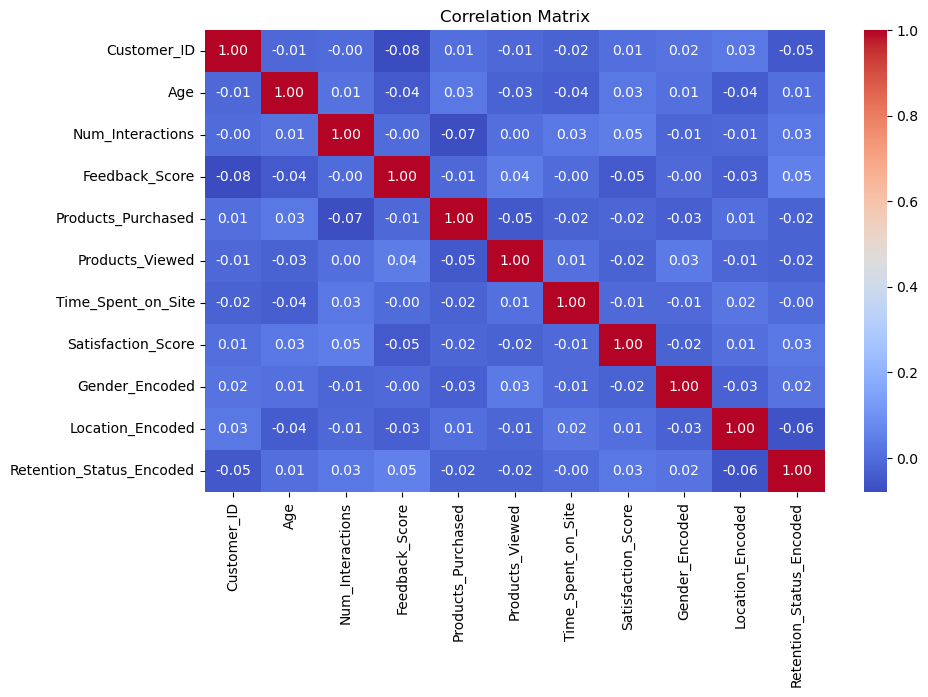

In [63]:
# Only numerical columns
numerical_cols = df.select_dtypes(include='number')

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Conclusion

# Age: 0.01 
    # Nearly zero correlation (no relationship)

# Num_Interactions: 0.03 
    # Very weak positive correlation (barely any relationship)

# Feedback_Score: 0.05 
    # Weak positive correlation
    # Suggests that higher feedback scores are slightly associated with higher retention

# Products_Purchased: -0.02
    # Very weak negative correlation (no meaningful relationship)

# Products_Viewed: -0.02
    # Very weak negative correlation (no meaningful relationship)

# Time_Spent_on_Site: -0.00
    # Essentially zero correlation (no relationship)

# Satisfaction_Score: 0.03
    # Very weak positive correlation
    # Slightly higher satisfaction might relate to slightly higher retention

# Gender_Encoded: 0.02
    # Very weak positive correlation (no meaningful relationship)

# Location_Encoded: -0.06
    # Weak negative correlation
    # Suggests certain locations might have slightly lower retention

#### Conclusion on Correlation heatmap

In [157]:
# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Calculate correlation of each numerical column with the target
correlations = df[numerical_cols].corr()['Retention_Status_Encoded'].sort_values(ascending=False)

print(correlations)

Retention_Status_Encoded    1.000000
Feedback_Score              0.051153
Satisfaction_Score          0.032324
Num_Interactions            0.032304
Gender_Encoded              0.018875
Age                         0.007620
Time_Spent_on_Site         -0.003968
Products_Purchased         -0.021281
Products_Viewed            -0.022111
Customer_ID                -0.048155
Location_Encoded           -0.062228
Name: Retention_Status_Encoded, dtype: float64


#### Feedback_Score (numerical) vs Retention_Status (categorical target).

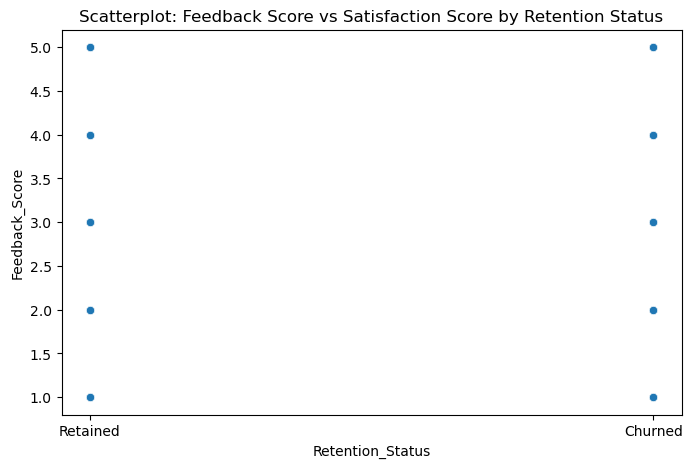

In [31]:
# 1. ScatterPlot

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Retention_Status', y='Feedback_Score', data=df)
plt.title("Scatterplot: Feedback Score vs Satisfaction Score by Retention Status")
plt.show()

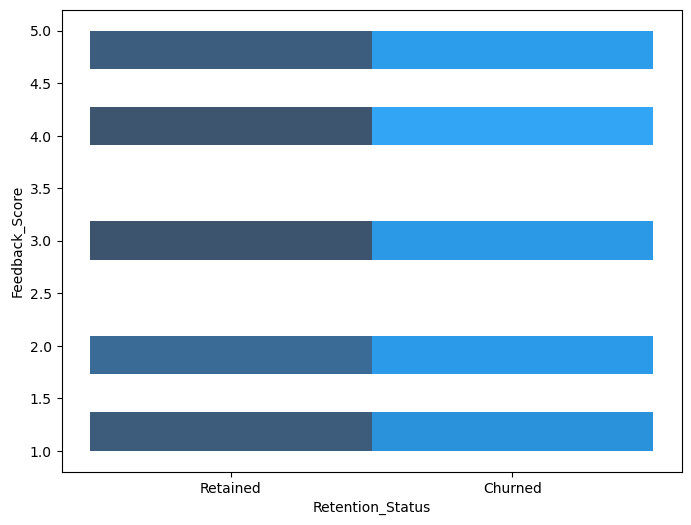

In [33]:
# 2. HistPlot

plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Retention_Status',y='Feedback_Score')
plt.show()

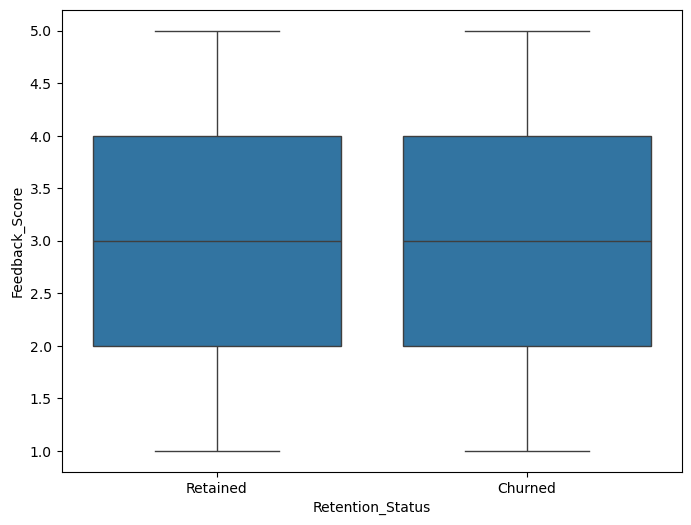

In [35]:
# Box Plot:

plt.figure(figsize=(8,6))
sns.boxplot(x='Retention_Status',y="Feedback_Score",data=df)
plt.show()

#### Conclusion on Feedback_Score vs Retention_Status

#### Satisfaction_Score (numerical) vs Retention_Status (categorical target).

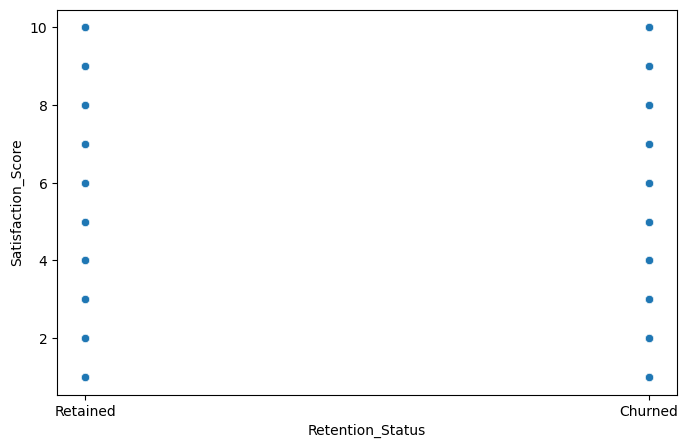

In [81]:
# 1. ScatterPot

plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Retention_Status',y='Satisfaction_Score')
plt.show()

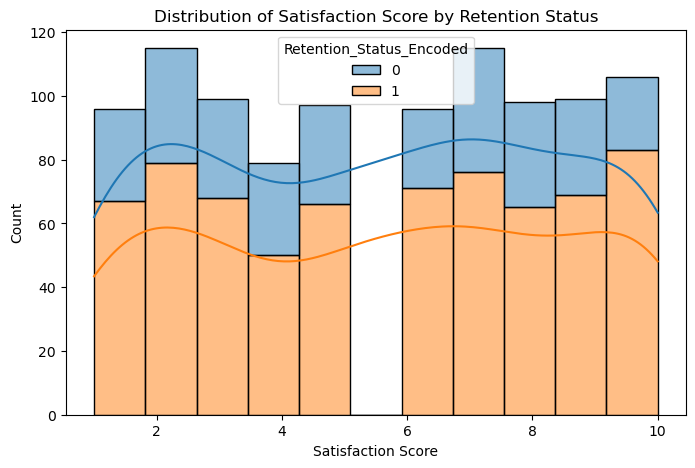

In [83]:
# 2. HistPlot

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Satisfaction_Score', hue='Retention_Status_Encoded', kde=True, multiple='stack')
plt.title("Distribution of Satisfaction Score by Retention Status")
plt.xlabel("Satisfaction Score")
plt.ylabel("Count")
plt.show()


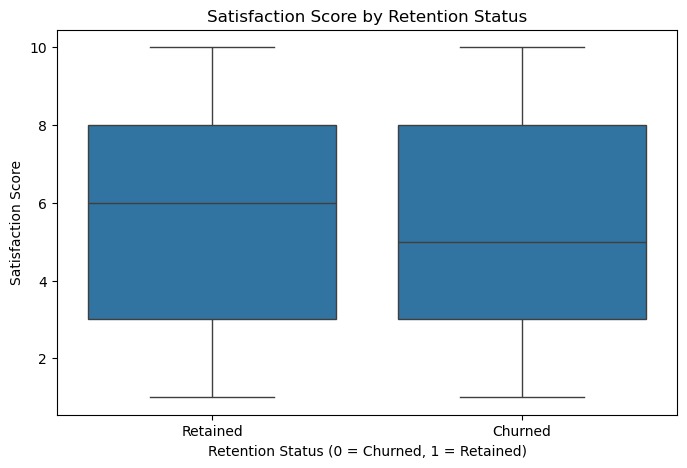

In [55]:
# 3. Box Plot

plt.figure(figsize=(8, 5))
sns.boxplot(x='Retention_Status', y='Satisfaction_Score', data=df)
plt.title("Satisfaction Score by Retention Status")
plt.xlabel("Retention Status (0 = Churned, 1 = Retained)")
plt.ylabel("Satisfaction Score")
plt.show()


#### Conclusion on Satisfaction_Score vs Retention_Status

#### Num_Interactions (numerical) vs Retention_Status (categorical target).

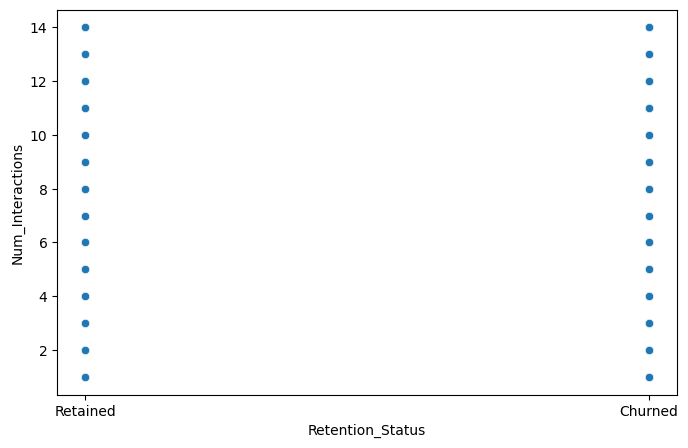

In [85]:
# 1. ScatterPlot

plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Retention_Status',y='Num_Interactions')
plt.show()

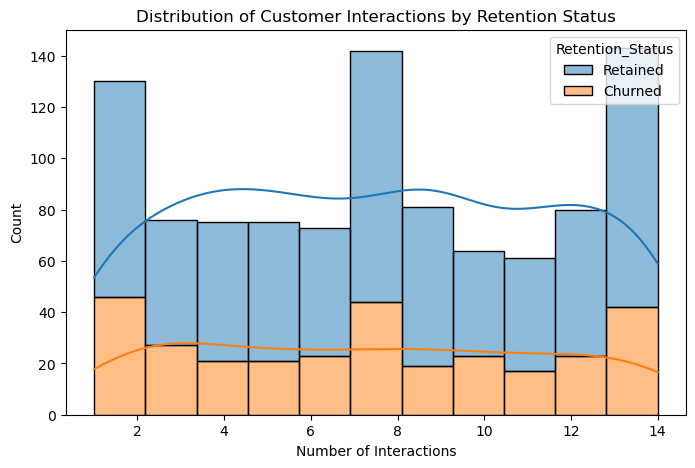

In [87]:
# 2. HistPlot

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Num_Interactions', hue='Retention_Status', kde=True, multiple='stack')
plt.title("Distribution of Customer Interactions by Retention Status")
plt.xlabel("Number of Interactions")
plt.ylabel("Count")
plt.show()


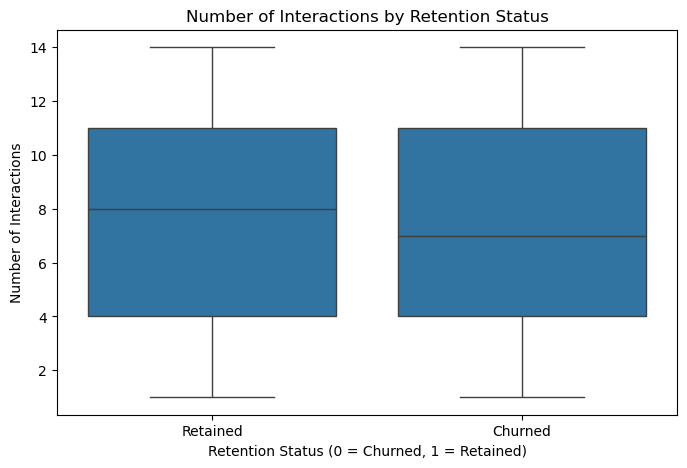

In [65]:
# 3. BoxPlot

plt.figure(figsize=(8, 5))
sns.boxplot(x='Retention_Status', y='Num_Interactions', data=df)
plt.title("Number of Interactions by Retention Status")
plt.xlabel("Retention Status (0 = Churned, 1 = Retained)")
plt.ylabel("Number of Interactions")
plt.show()


#### Conclusion on Num_Interactions vs Retention_Status

#### Products_Purchased (Numerical) vs Retention_Status(Categorica target)

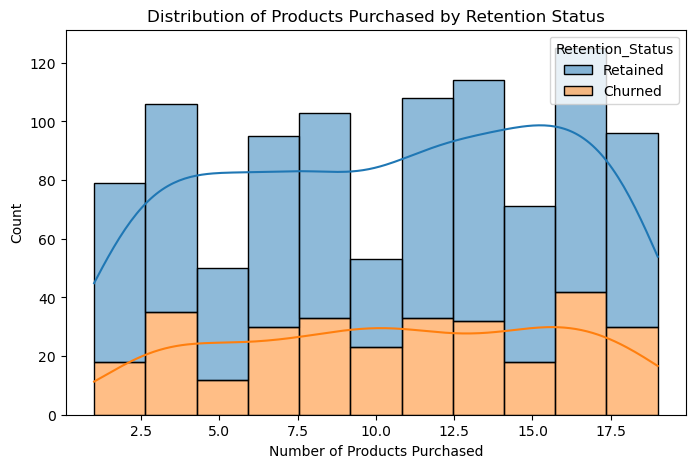

In [92]:
# 1. HistPlot

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Products_Purchased', hue='Retention_Status', kde=True, multiple='stack')
plt.title('Distribution of Products Purchased by Retention Status')
plt.xlabel('Number of Products Purchased')
plt.ylabel('Count')
plt.show()


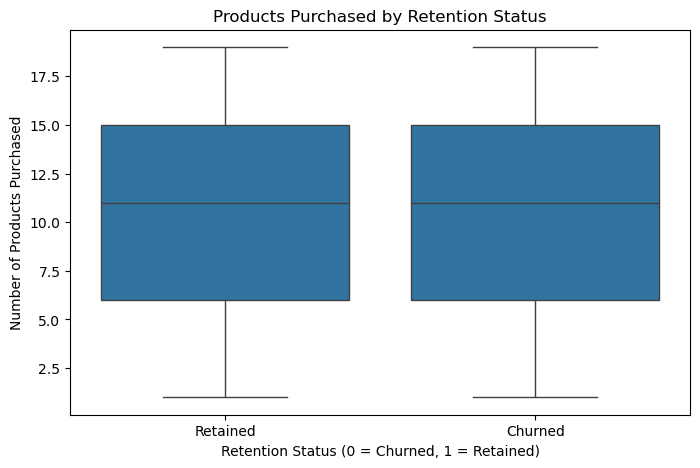

In [96]:
# 2. BoxPlot

plt.figure(figsize=(8,5))
sns.boxplot(x='Retention_Status', y='Products_Purchased', data=df)
plt.title('Products Purchased by Retention Status')
plt.xlabel('Retention Status ')
plt.ylabel('Number of Products Purchased')
plt.show()

#### Conclusion on Products_Purchased vs Retention_Status


#### Products_Viewed(Numerical) vs Retention_Status(Categorical target)

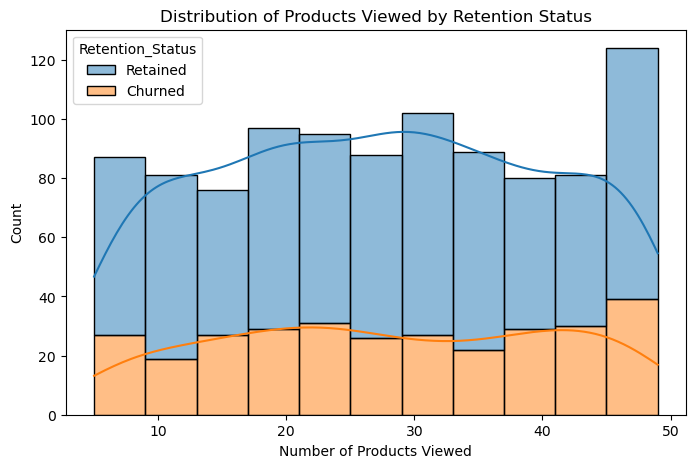

In [102]:
# 1. HistPlot

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Products_Viewed', hue='Retention_Status', kde=True, multiple='stack')
plt.title('Distribution of Products Viewed by Retention Status')
plt.xlabel('Number of Products Viewed')
plt.ylabel('Count')
plt.show()


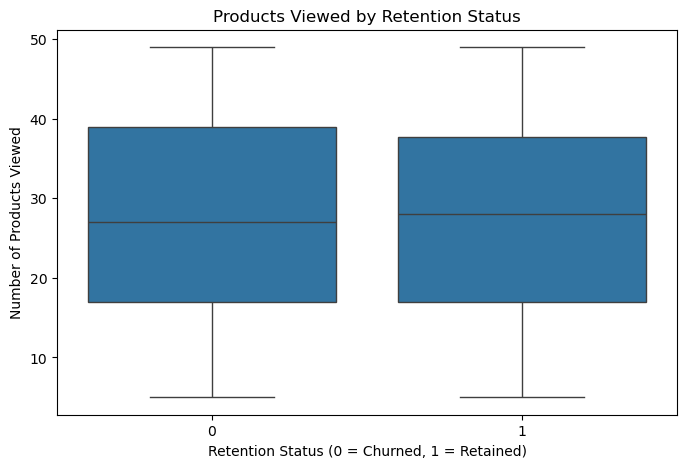

In [104]:
# 2. BoxPlot

plt.figure(figsize=(8,5))
sns.boxplot(x='Retention_Status_Encoded', y='Products_Viewed', data=df)
plt.title('Products Viewed by Retention Status')
plt.xlabel('Retention Status (0 = Churned, 1 = Retained)')
plt.ylabel('Number of Products Viewed')
plt.show()

#### Conclusion on Product_Viwed vs Retention_Status

#### Location (Catagorical) vs Retention_Status (categorical target).

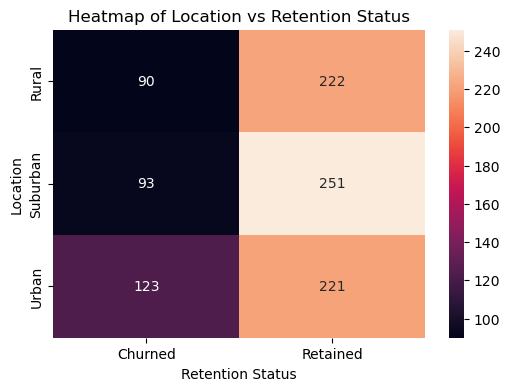

In [108]:
# contingency_table
contingency_table=pd.crosstab(df['Location'], df['Retention_Status'])

plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Heatmap of Location vs Retention Status')
plt.xlabel('Retention Status')
plt.ylabel('Location')
plt.show()


#### Conclusion on Location vs Retention_Status

#### Gender (Categorical) vs Retention_Status(Categorical target)

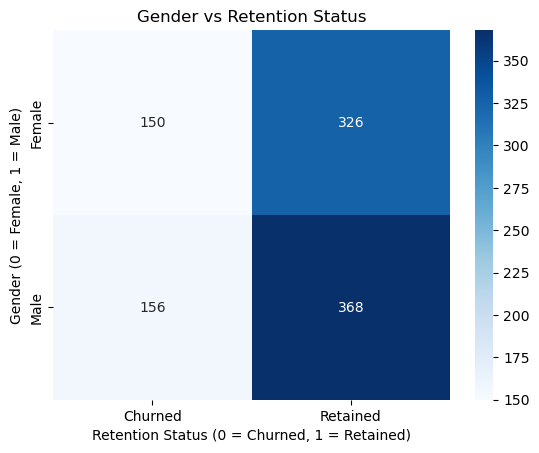

In [116]:
# contingency table
contingency_table = pd.crosstab(df['Gender'], df['Retention_Status'])

# heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Gender vs Retention Status')
plt.xlabel('Retention Status (0 = Churned, 1 = Retained)')
plt.ylabel('Gender (0 = Female, 1 = Male)')
plt.show()

#### Conclusion On Gender vs Retention_Status


### Overall Conclusion from Bivariate analysis

### Multivariate analysis

#### Feedback_Score vs Products_Purchased grouped by Retention_Status

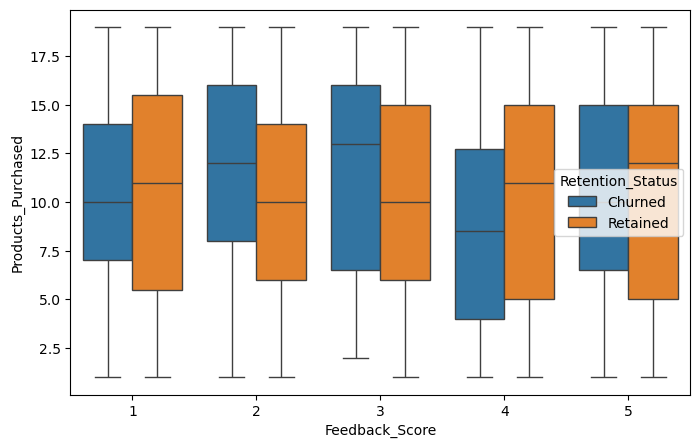

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Feedback_Score',y='Products_Purchased',hue='Retention_Status')
plt.show()

#### Conclusion:

#### Satisfaction_Score vs Products_Purchased grouped by Retention_Status

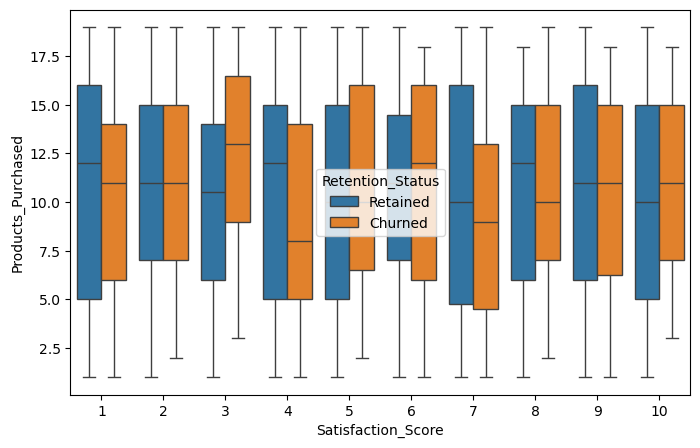

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Satisfaction_Score',y='Products_Purchased',hue='Retention_Status')
plt.show()

#### Conclusion:


#### Num_Interactions vs Satisfaction_Score Grouped by Retention_Status

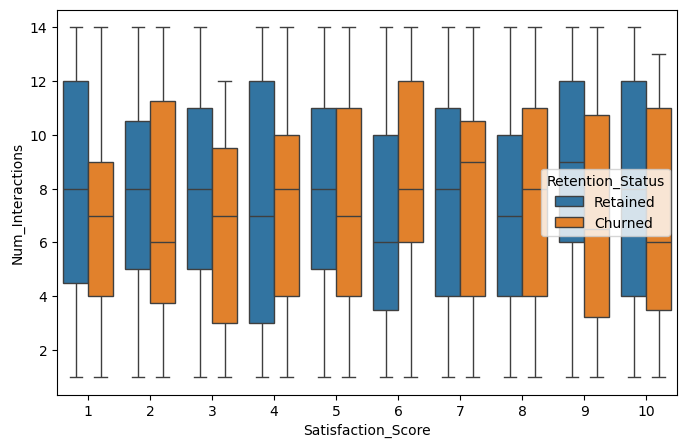

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Satisfaction_Score',y='Num_Interactions',hue='Retention_Status')
plt.show()

#### Conclusion:


#### Num_Interactionns vs Products_Purchased Grouped by Retention_Status

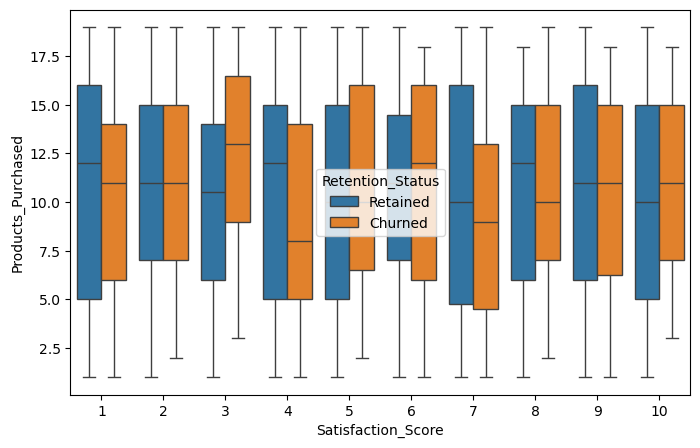

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Satisfaction_Score',y='Products_Purchased',hue='Retention_Status')
plt.show()

#### Conclusion:


#### Time_spent_on_Site vs Products_Viewed Grouped by Retention_Status

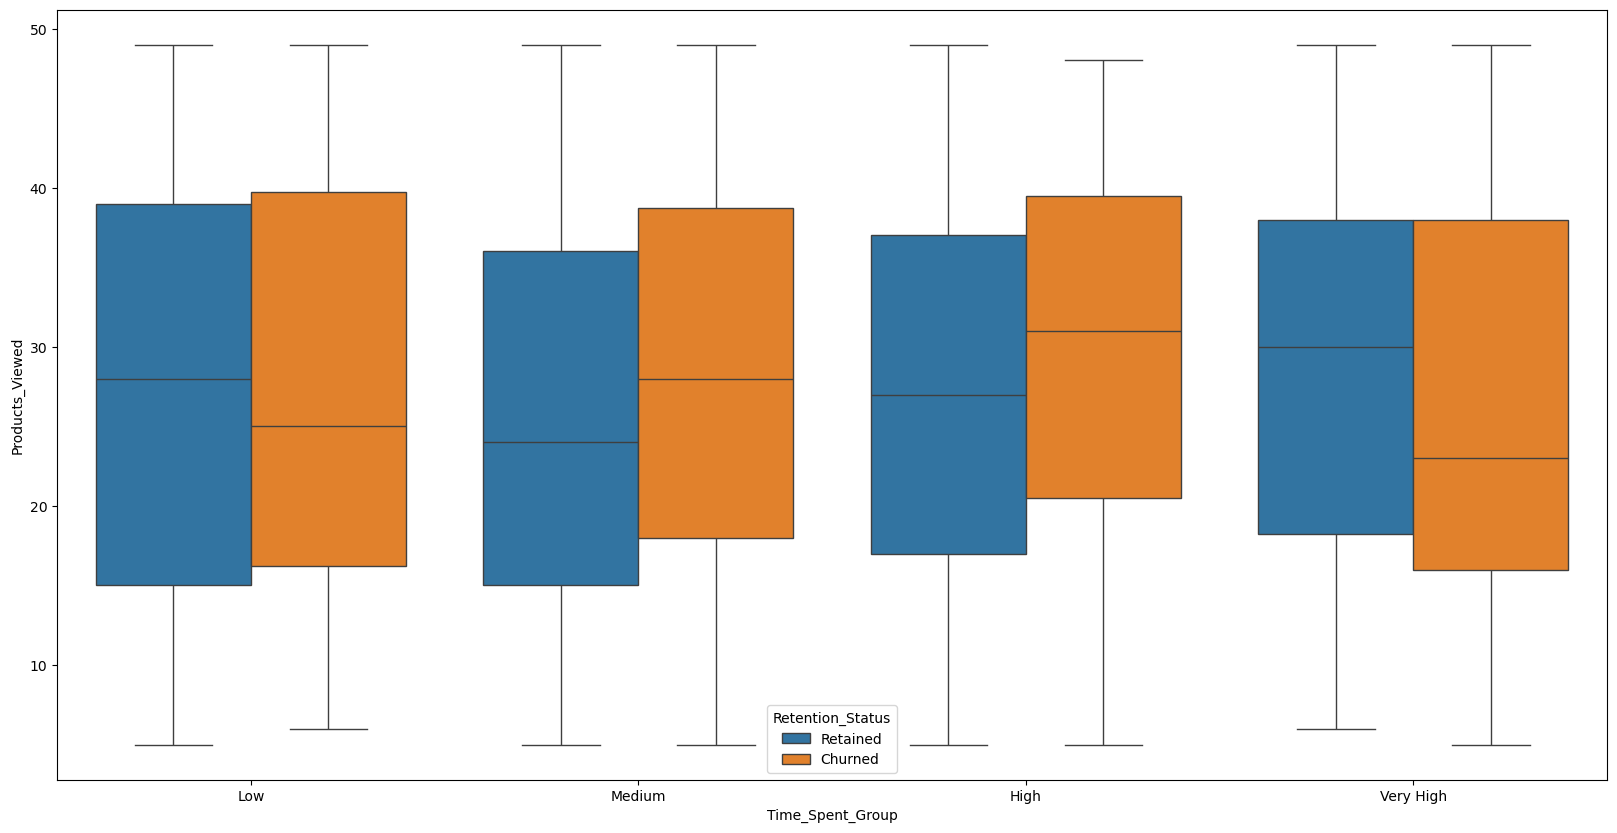

In [60]:
df['Time_Spent_Group'] = pd.cut(df['Time_Spent_on_Site'],
                                bins=4,
                                labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(20,10))
sns.boxplot(data=df,x="Time_Spent_Group",y='Products_Viewed',hue='Retention_Status')
plt.show()

#### Conclusion:

#### Location vs Age Grouped by Retention_Status

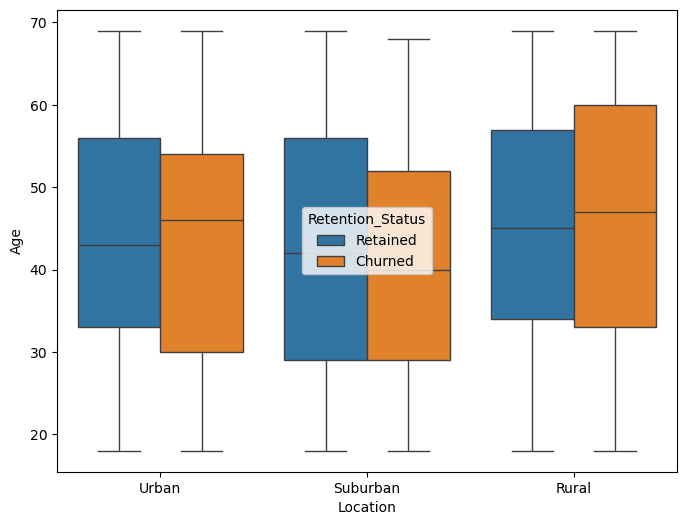

In [ ]:
# Boxplot 

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Location',y='Age',hue="Retention_Status")
plt.show()

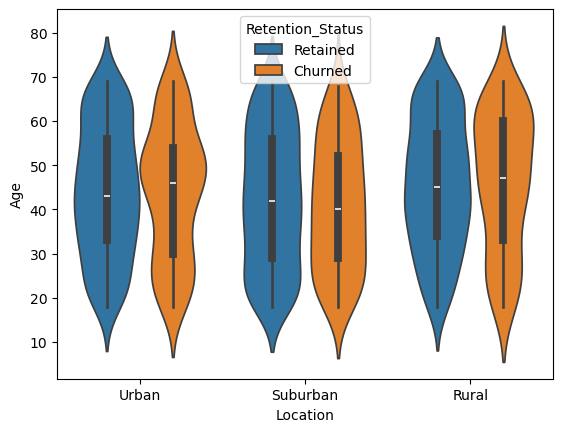

In [54]:
# Violin plot

sns.violinplot(x='Location', y='Age',hue='Retention_Status', data=df)
plt.show()


#### Conclusion:


### Overall Conclusion on Multivariate Analysis: